In [3]:
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import re
import math

In [4]:
DIRECTORY = "C:\\Users\\AHaeg\\Documents\\CM_RL_Driver\\RL\\rl_data\\first_trial_1\\rl_uaq_store"
file_list = os.listdir(DIRECTORY)

In [5]:
mean_vel = np.zeros(1000,2)

In [6]:
for file in file_list:
 
    matched = re.match("ep_(?P<ep_num>[0-9]+).json", file)
    JSON_FILE = os.path.join(DIRECTORY, file)
    size = os.stat(JSON_FILE).st_size
    is_match = bool(matched) and (size > 1e5)

    if is_match:
        ep_num = int(matched.group('ep_num'))

        last_ep_num = ep_num
        data = pd.read_json(JSON_FILE)
        data['filename'] = file
        mean_vel[ep_num] = data['Vhcl.v'].mean()


        print(JSON_FILE + ": \t" + str(ep_num) + "\t" + str(mean_vel[ep_num]))

M_RL_Driver\RL\rl_data\first_trial_1\rl_uaq_store\ep_138.json: 	138	14.951163683111744
C:\Users\AHaeg\Documents\CM_RL_Driver\RL\rl_data\first_trial_1\rl_uaq_store\ep_139.json: 	139	16.422443117826127
C:\Users\AHaeg\Documents\CM_RL_Driver\RL\rl_data\first_trial_1\rl_uaq_store\ep_140.json: 	140	14.434244655303788
C:\Users\AHaeg\Documents\CM_RL_Driver\RL\rl_data\first_trial_1\rl_uaq_store\ep_141.json: 	141	11.399447182091818
C:\Users\AHaeg\Documents\CM_RL_Driver\RL\rl_data\first_trial_1\rl_uaq_store\ep_142.json: 	142	15.147452881022737
C:\Users\AHaeg\Documents\CM_RL_Driver\RL\rl_data\first_trial_1\rl_uaq_store\ep_143.json: 	143	18.741948749146232
C:\Users\AHaeg\Documents\CM_RL_Driver\RL\rl_data\first_trial_1\rl_uaq_store\ep_144.json: 	144	24.810139266020155
C:\Users\AHaeg\Documents\CM_RL_Driver\RL\rl_data\first_trial_1\rl_uaq_store\ep_145.json: 	145	22.56239172969572
C:\Users\AHaeg\Documents\CM_RL_Driver\RL\rl_data\first_trial_1\rl_uaq_store\ep_146.json: 	146	12.78167618019361
C:\Users\AH

In [9]:
def movingaverage(interval, window_size):
    window= numpy.ones(int(window_size))/float(window_size)
    return numpy.convolve(interval, window, 'same')

In [14]:
xy = mean_vel[mean_vel != 0]
x = xy[:,0]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

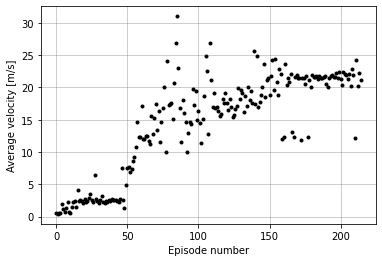

In [10]:
plt.plot(mean_vel[mean_vel != 0],"k.")

y_av = movingaverage(y, 10)

plot(x, y_av,"r")

plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.4)
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

plt.xlabel("Episode number")
plt.ylabel("Average velocity [m/s]")

plt.show()